## Fuentes
* Este contenido fue tomado del curso MINF4538 Big Data Analysis - University of Zurich <a href=https://lms.uzh.ch/auth/RepositoryEntry/16703094861>Big Data Analytics</a> y el uso fue autorizado por el profesor Sven Helmer

* Adaptaciones menores hechas para nuestro curso.

# Finding Anscombe's Quartet Quickly with Pandas and Aggregation

In [1]:
import pandas as pd
import numpy as np

In case, the file anscombes.csv is not in your working directory yet:

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [3]:
# If we don't specify the path any further, the data file needs to be in our working directory 
data = pd.read_csv('anscombes.csv', index_col=0)

The CSV-file is loaded into a so-called DataFrame, which can be seen as a generalized numpy array, i.e., the data comes with its metadata, such as column names, and a set of interesting operators. In certain ways, it also behaves like a dictionary.

In [4]:
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
   dataset     x      y
id                     
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38

The "Non-Technical Introduction to Python" course offered by the marketing chair (Olat link: https://lms.uzh.ch/auth/RepositoryEntry/16444784789/CourseNode/94345298498069) offers very helpful slides (under /Course Material/Day 2) about pandas and aggregation (and other important topics like visualization). 

In [5]:
# Note that this produces a multilevel index (and the variance is calculated with 1 degree of freedom)
data.groupby('dataset')[['x','y']].agg(['mean','var'])

x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

In [6]:
# By resetting the index, we can replace the Roman numerals with integers
data.groupby('dataset')[['x','y']].agg(['mean','var']).reset_index(drop=True)

x               y          
  mean   var      mean       var
0  9.0  11.0  7.500909  4.127269
1  9.0  11.0  7.500909  4.127629
2  9.0  11.0  7.500000  4.122620
3  9.0  11.0  7.500909  4.123249

The function var() for DataFrames computes the variance slightly different to the var() function of numpy. This has to do with the degrees of freedom assumed in each case. For a more detailed discussion of degrees of freedom (and variance) see here: http://onlinestatbook.com/2/estimation/df.html

In [7]:
# The built-in pd.DataFrame.var() function uses 1 degrees of freedom, which isn't the variance we are looking for. 
# We can use a custom lambda function to calculate the variance using zero degrees of freedom.
# If we wanted to, we could also rename the columns with the .rename() command.
data.groupby('dataset')[['x','y']].agg(['mean',lambda x: x.var(ddof=0)])

x                    y           
        mean <lambda_0>      mean <lambda_0>
dataset                                     
I        9.0       10.0  7.500909   3.752063
II       9.0       10.0  7.500909   3.752390
III      9.0       10.0  7.500000   3.747836
IV       9.0       10.0  7.500909   3.748408

In [8]:
# The correlation matrices of each Anscombe's quartet
data.groupby('dataset')[['x','y']].corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

We will have a closer look at the visualization of data in a later part of the course.

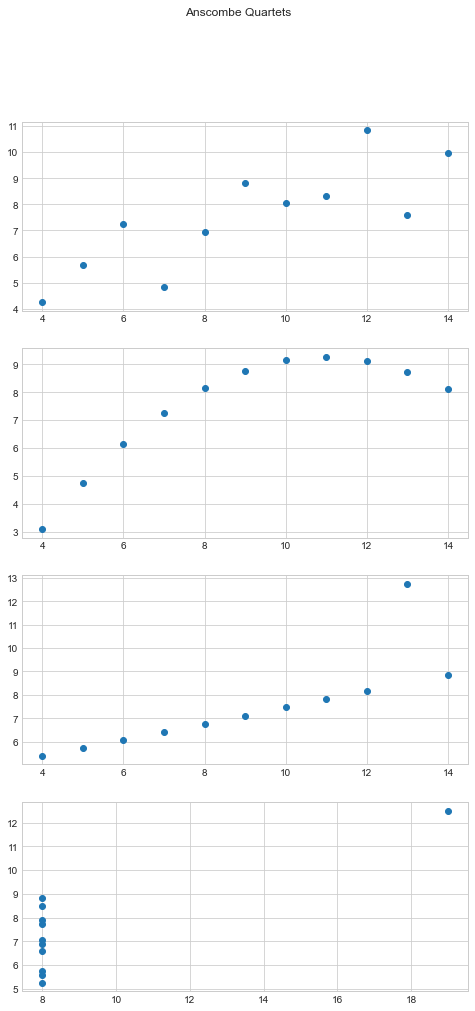

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig, axs = plt.subplots(4, figsize=(8,16))
fig.suptitle('Anscombe Quartets')
axs[0].plot(data[data['dataset']=='I'].x, data[data['dataset']=='I'].y, 'o');
axs[1].plot(data[data['dataset']=='II'].x, data[data['dataset']=='II'].y, 'o');
axs[2].plot(data[data['dataset']=='III'].x, data[data['dataset']=='III'].y, 'o');
axs[3].plot(data[data['dataset']=='IV'].x, data[data['dataset']=='IV'].y, 'o');


